[*********************100%***********************]  1 of 1 completed
Annual Volatility (Standard Deviation): 31.82%
Annual 95% VaR: -52.93%
Annual 95% CVaR: 68.36%


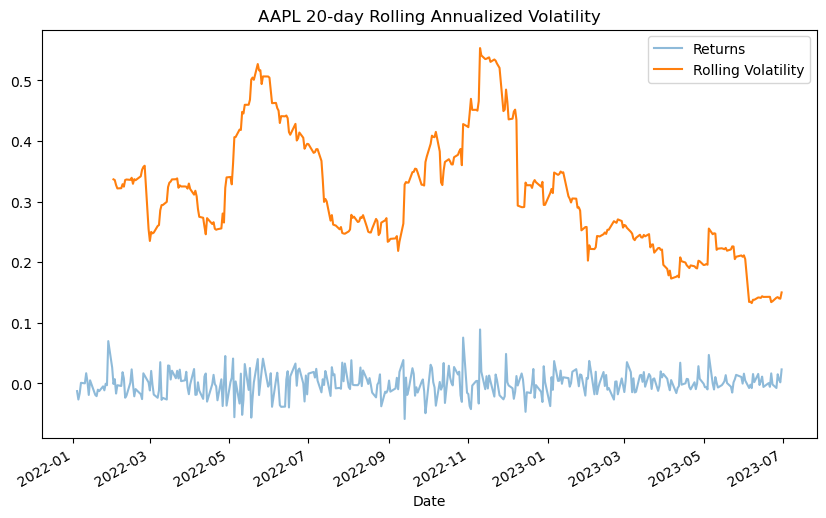

In [1]:
import yfinance as yf
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
# 下载TSLA数据
data = yf.download('AAPL', start='2022-01-01', end='2023-07-01')
# 计算日回报
returns = data['Close'].pct_change().dropna()
# 标准差（波动率）
daily_volatility = returns.std()
annual_volatility = daily_volatility * np.sqrt(252)
print(f"Annual Volatility (Standard Deviation): {annual_volatility * 100:.2f}%")
# 95%置信水平的VaR
alpha = 0.05
daily_VaR_95 = - (returns.mean() - returns.std() * norm.ppf(alpha))
annual_VaR_95 = daily_VaR_95 * np.sqrt(252)
print(f"Annual 95% VaR: {annual_VaR_95 * 100:.2f}%")
# 95%置信水平的CVaR
losses = sorted(returns)
daily_cVar_95 = -np.mean(losses[:int(alpha * len(losses))])
annual_cVar_95 = daily_cVar_95 * np.sqrt(252)
print(f"Annual 95% CVaR: {annual_cVar_95 * 100:.2f}%")
# 可视化波动性聚集
plt.figure(figsize=(10,6))
rolling_volatility = returns.rolling(window=20).std() * np.sqrt(252)  # Annualized rolling volatility
returns.plot(title="AAPL Daily Returns", alpha=0.5)
rolling_volatility.plot(title="AAPL 20-day Rolling Annualized Volatility")
plt.legend(["Returns", "Rolling Volatility"])
plt.show()

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
# 下载数据
data = yf.download("AAPL", start="2022-01-01", end="2023-07-01")['Close']
# 计算日回报率
returns = data.pct_change().dropna()
# 历史模拟法
historical_var = - np.percentile(returns, 5)
# 方差-协方差法
mu = returns.mean()
sigma = returns.std()
var_covar_var = - (mu - 1.645 * sigma)  # 1.645 对应于正态分布的5%分位数
# 蒙特卡罗模拟法
np.random.seed(42)
dt = 1/252  # 假设一年有252个交易日
sim_returns = [returns.iloc[np.random.randint(len(returns))] + np.random.normal(mu*dt, sigma*np.sqrt(dt)) for _ in range(252000)]
sim_returns = np.array(sim_returns).reshape(1000, 252)
sim_vars = np.percentile(sim_returns, 5, axis=1)
monte_carlo_var = - np.percentile(sim_vars, 5)
# 打印结果
print(f"VaR from Historical Simulation: {historical_var:.2%}")
print(f"VaR from Variance-Covariance: {var_covar_var:.2%}")
print(f"VaR from Monte Carlo Simulation: {monte_carlo_var:.2%}")

[*********************100%***********************]  1 of 1 completed
VaR from Historical Simulation: 3.32%
VaR from Variance-Covariance: 3.26%
VaR from Monte Carlo Simulation: 3.77%
